## Imports

In [1]:
from operator import itemgetter

In [2]:
import networkx as nx

## Config

In [3]:
feature_list_id = 'magic_graph'

## Read Data

In [4]:
feature_lists = [
    'extrapolated_qid_raw',
]

In [5]:
X_train, X_test, _ = load_feature_lists(feature_lists)

## Build Features

In [6]:
def create_graph(df):
    g = nx.Graph()
    g.add_nodes_from(df['extrapolated_id_q1'])

    edges = list(df[['extrapolated_id_q1', 'extrapolated_id_q2']].to_records(index=False))

    g.add_edges_from(edges)
    g.remove_edges_from(g.selfloop_edges())
    
    return g

In [7]:
df = pd.concat([X_train, X_test])

In [8]:
q1_vc = df['extrapolated_id_q1'].value_counts().to_dict()
q2_vc = df['extrapolated_id_q2'].value_counts().to_dict()

In [9]:
def get_question_frequency(qid):
    return q1_vc.get(qid, 0) + q2_vc.get(qid, 0)

In [10]:
graph = create_graph(df)

In [11]:
connected_component_frequency_cache = {}

In [12]:
def get_connected_component_frequency(qid):
    if qid in connected_component_frequency_cache:
        return connected_component_frequency_cache[qid]
    
    component = nx.node_connected_component(graph, qid)
    total_freq = sum(
        get_question_frequency(node)
        for node in component
    )
    avg_freq = total_freq / len(component)
    result = [len(component), total_freq, avg_freq]
    
    for node in component:
        connected_component_frequency_cache[node] = result
    
    return result

In [13]:
cc_freqs = df['extrapolated_id_q1'].map(get_connected_component_frequency)

In [14]:
df['graph_cc_size'] = cc_freqs.map(itemgetter(0))
df['graph_cc_freq_total'] = cc_freqs.map(itemgetter(1))
df['graph_cc_freq_avg'] = cc_freqs.map(itemgetter(2))

In [15]:
df.head(15)

,extrapolated_id_q1,extrapolated_id_q2,graph_cc_size,graph_cc_freq_total,graph_cc_freq_avg
0,0,1,3,4,1.333333
1,2,3,16,30,1.875000
2,4,5,3,4,1.333333
3,6,7,2,2,1.000000
4,8,9,10,18,1.800000
5,10,11,2,2,1.000000
6,12,13,2,2,1.000000
7,14,15,2,2,1.000000
8,16,17,11,24,2.181818
9,18,19,2,2,1.000000


In [16]:
X_train = df[:len(X_train)]
X_test = df[len(X_train):]

## Save feature names

In [17]:
columns_to_keep = [
    'graph_cc_size',
    'graph_cc_freq_total',
    'graph_cc_freq_avg',
]

In [18]:
X_train = X_train[columns_to_keep]
X_test = X_test[columns_to_keep]

In [19]:
feature_names = [
    'magic_graph_cc_size',
    'magic_graph_cc_freq_total',
    'magic_graph_cc_freq_avg',
]

In [20]:
save_lines(feature_names, features_data_folder + f'X_train_{feature_list_id}.names')

## Save features

In [21]:
save(X_train.values, features_data_folder + f'X_train_{feature_list_id}.pickle')

In [22]:
save(X_test.values, features_data_folder + f'X_test_{feature_list_id}.pickle')

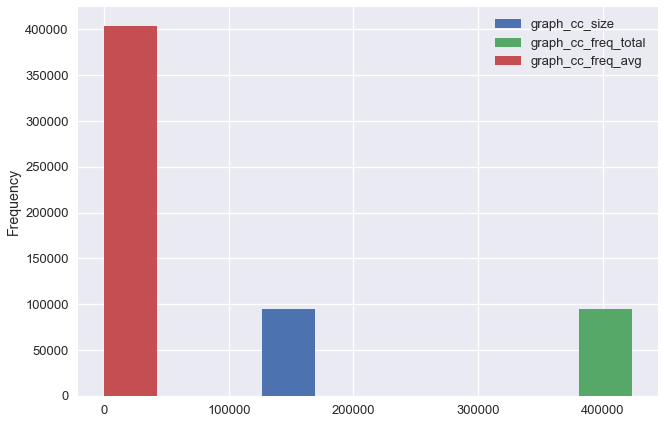

In [23]:
X_train.plot.hist()

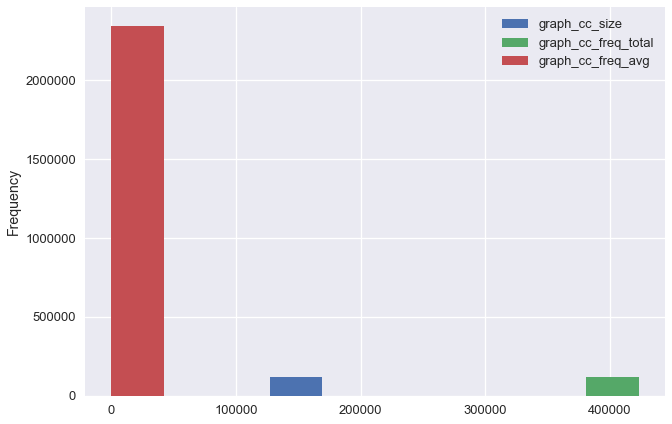

In [24]:
X_test.plot.hist()